<a href="https://colab.research.google.com/github/psihometr13/IntelligentDataAnalysis/blob/main/%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%8C%D0%BD%D0%B8%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Підготовка даних

*   Завантаженння набору даних і перевірка його на наявність відсутніх значень.
*   Видалення записів з відсутніми значеннями або заповнення їх, якщо це можливо.
*   Перевірка типів даних для кожного стовпця і, за потреби, заміна їх на відповідні.

In [157]:
import pandas as pd

# Завантаження даних з CSV-файлу
data=pd.read_csv('data.csv')

In [158]:
# Відображення перших декількох рядків даних
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
# Перевірка наявності відсутніх значень
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [160]:
import plotly.graph_objects as go

# Розраховуємо відсоток відсутніх значень по кожному стовпцю
missing_values = data.isnull().sum() / len(data) * 100

# Побудова графіку розподілу відсутніх значень
fig = go.Figure(data=[go.Bar(x=missing_values.index, y=missing_values,
                            marker=dict(color='steelblue'))])
fig.update_layout(title='Розподіл відсутніх значень по стовпцям',
                  xaxis_title='Стовпці', yaxis_title='Відсоток відсутніх значень',
                  plot_bgcolor='white', showlegend=False)
fig.update_traces(texttemplate='%{y:.1f}%', textposition='outside')
fig.update_xaxes(tickangle=45, tickfont=dict(size=10))
fig.update_yaxes(tickformat=".0f")
fig.show()


In [161]:
# Заповнення відсутніх значень
data['Critic_Score'].fillna(data['Critic_Score'].mean(), inplace=True)

In [162]:
# Заповнення відсутніх значень модальним значенням
data['User_Score'].fillna(data['User_Score'].mode()[0], inplace=True)

In [163]:
# Перетворення типів даних
data['Year_of_Release'] = pd.to_datetime(data['Year_of_Release'], format='%Y')

In [164]:
# Виведення інформації про оновлені дані
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.967679,NaN,tbd,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.967679,NaN,tbd,NaN,NaN,NaN


# Експлораторний аналіз даних


*   Використання основних статистичних метрик (середнє значення, медіана, мода, мінімальне та максимальне значення) для отримання загального уявлення про дані.
*   Використання графіків і візуалізації для вивчення розподілу даних, залежностей між змінними і виявлення потенційних випадкових закономірностей або взаємозв'язків.
*   Використання бібліотеки CUFFLINKS для створення інтерактивних графіків на основі даних.


In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Виведення загальної інформації про дані
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             16717 non-null  object        
 1   Platform         16719 non-null  object        
 2   Year_of_Release  16450 non-null  datetime64[ns]
 3   Genre            16717 non-null  object        
 4   Publisher        16665 non-null  object        
 5   NA_Sales         16719 non-null  float64       
 6   EU_Sales         16719 non-null  float64       
 7   JP_Sales         16719 non-null  float64       
 8   Other_Sales      16719 non-null  float64       
 9   Global_Sales     16719 non-null  float64       
 10  Critic_Score     16719 non-null  float64       
 11  Critic_Count     8137 non-null   float64       
 12  User_Score       16719 non-null  object        
 13  User_Count       7590 non-null   float64       
 14  Developer        10096 non-null  objec

In [166]:
# Описова статистика числових змінних
data.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,7590.000000
mean,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,0.813514,0.503283,0.308818,0.186710,1.547935,9.723417,18.980495,561.282326
min,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,0.000000,0.000000,0.000000,0.000000,0.060000,68.967679,12.000000,10.000000
50%,0.080000,0.020000,0.000000,0.010000,0.170000,68.967679,21.000000,24.000000
75%,0.240000,0.110000,0.040000,0.030000,0.470000,70.000000,36.000000,81.000000
max,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [167]:
import plotly.express as px

# Вибір змінних для аналізу
variables = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']

# Побудова матриці графіків розсіювання
fig = px.scatter_matrix(data[variables])

# Налаштування заголовка та розмірів графіків
fig.update_layout(title='Графіки розсіювання', height=800, width=800)

# Показати графік
fig.show()

In [168]:
# Розподіл продажів відеоігор по жанрах
genre_sales = data.groupby('Genre')['Global_Sales'].sum().reset_index()
fig = px.bar(genre_sales, x='Genre', y='Global_Sales', title='Розподіл продажів відеоігор по жанрах', color='Genre')
fig.show()

In [169]:
# Розподіл рейтингів відеоігор
rating_counts = data['Rating'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Count']
fig = px.pie(rating_counts, values='Count', names='Rating', title='Розподіл рейтингів відеоігор')
fig.show()

In [170]:
# Залежність між оцінкою критиків та глобальними продажами
fig = px.scatter(data, x='Critic_Score', y='Global_Sales', title='Залежність між оцінкою критиків та глобальними продажами', color='Critic_Score')
fig.show()

In [171]:
# Залежність між оцінкою користувачів та глобальними продажами
fig4 = px.scatter(data, x='User_Score', y='Global_Sales', title='Залежність між оцінкою користувачів та глобальними продажами')
fig4.show()

In [172]:
# Розподіл глобальних продажів відеоігор по рокам
year_sales = data.groupby('Year_of_Release')['Global_Sales'].sum().reset_index()
fig5 = px.line(year_sales, x='Year_of_Release', y='Global_Sales', title='Розподіл глобальних продажів відеоігор по рокам')
fig5.show()

In [173]:
# Графік розподілу кількості оцінок критиків та користувачів
fig7 = px.scatter(data, x='Critic_Count', y='User_Count', title='Розподіл кількості оцінок критиків та користувачів', color='Critic_Count')
fig7.show()

In [174]:
# Графік розподілу глобальних продажів відеоігор по видавництвам
publisher_sales = data.groupby('Publisher')['Global_Sales'].sum().reset_index().nlargest(10, 'Global_Sales')
fig8 = px.bar(publisher_sales, x='Publisher', y='Global_Sales', title='Розподіл глобальних продажів відеоігор по видавництвам', color='Publisher')
fig8.show()

Text(0, 0.5, 'Critic Score')

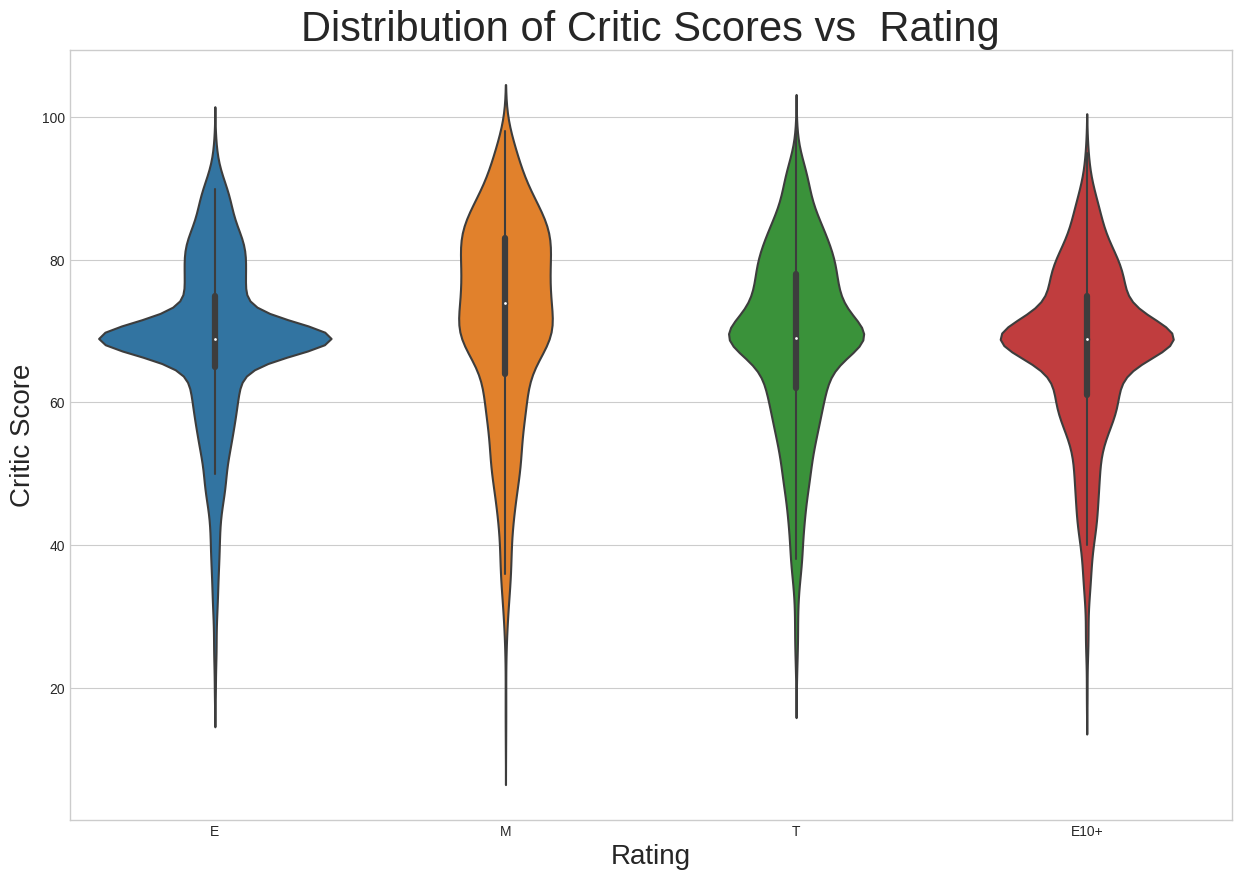

In [175]:
df=data[data['Rating'].isin(['E','T','E10+','M'])]
plt.figure(figsize=(15,10))
sns.violinplot(x='Rating',y='Critic_Score',data=df)
plt.title('Distribution of Critic Scores vs  Rating',fontdict={'fontsize':30})
plt.xlabel('Rating',fontdict={'fontsize':20})
plt.ylabel('Critic Score',fontdict={'fontsize':20})

# Кластерний аналіз


*   Використання алгоритмів кластеризації, такі як k-середніх або ієрархічна кластеризація, для групування ігор за подібними характеристиками.
*   Візуалізування результатів кластерного аналізу, використовуючи різні кольори або маркери для кожного кластера.

In [176]:
import pandas as pd
import cufflinks as cf
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Виключити рядки зі значеннями 'tbd'
data = data[data['Rating'] != 'tbd'].dropna()

# Вибір потрібних змінних для кластерного аналізу
selected_features = ['Critic_Score', 'User_Score', 'Global_Sales']
cluster_data = data[selected_features]

# Перетворення даних в матрицю
X = cluster_data.values

# Визначення кількості кластерів
k = 3

# Виконання кластеризації з використанням алгоритму K-means
kmeans = KMeans(n_clusters=k, random_state=0)
cluster_labels = kmeans.fit_predict(X)

# Додавання міток кластерів до вихідних даних
data['Cluster'] = cluster_labels

# Виведення результатів кластерного аналізу
print(data[['Critic_Score', 'User_Score', 'Global_Sales', 'Cluster']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



       Critic_Score User_Score  Global_Sales  Cluster
0              76.0          8         82.53        0
2              82.0        8.3         35.52        0
3              80.0          8         32.77        0
6              89.0        8.5         29.80        0
7              58.0        6.6         28.92        2
...             ...        ...           ...      ...
16667          46.0        2.4          0.01        1
16677          81.0        8.8          0.01        0
16696          80.0        7.6          0.01        0
16700          61.0        5.8          0.01        2
16706          60.0        7.2          0.01        2

[6825 rows x 4 columns]


In [177]:
# Візуалізація результатів кластерного аналізу
fig = px.scatter_3d(data, x='Critic_Score', y='User_Score', z='Global_Sales', color='Cluster')
fig.show()

In [178]:
# Графік розподілу відеоігор за кластерами (кругова діаграма):
cluster_counts = data['Cluster'].value_counts()

fig = px.pie(names=cluster_counts.index, values=cluster_counts.values, title='Розподіл відеоігор за кластерами')
fig.show()

In [179]:
# Графік розсіювання оцінок критиків та користувачів з розміткою кластерів
fig = px.scatter(data, x='Critic_Score', y='User_Score', color='Cluster',
                 title='Розсіювання оцінок критиків та користувачів з розміткою кластерів')
fig.show()

In [180]:
# Графік розподілу кількості оцінок критиків за кластерами
fig = px.histogram(data, x='Critic_Count', color='Cluster', title='Розподіл кількості оцінок критиків за кластерами')
fig.show()

In [181]:
# Графік розподілу рейтингу ESRB за кластерами
fig = px.histogram(data, x='Rating', color='Cluster', title='Розподіл рейтингу ESRB за кластерами')
fig.show()

# Кореляційний аналіз


*   Обчислення матриці кореляції між різними числовими змінними (наприклад, продажі в різних регіонах, оцінка критиків і користувачів)
*   Візуалізування матриці кореляції за допомогою теплової карти для виявлення сильних або слабких взаємозв'язків між змінними


In [182]:
import pandas as pd
import plotly.graph_objects as go

# Вибір числових змінних
numeric_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']

# Створення підмножини даних з числовими змінними
numeric_data = data[numeric_features]

# Обчислення матриці кореляції
correlation_matrix = numeric_data.corr()

correlation_matrix

<ipython-input-182-fcbb9e43668b>:11: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
NA_Sales,1.000000,0.841808,0.468607,0.726757,0.955793,0.233580,0.283917,0.246208
EU_Sales,0.841808,1.000000,0.519929,0.716330,0.939313,0.213102,0.265740,0.283504
JP_Sales,0.468607,0.519929,1.000000,0.394823,0.613546,0.147314,0.168299,0.072773
Other_Sales,0.726757,0.716330,0.394823,1.000000,0.804028,0.191509,0.239513,0.240085
Global_Sales,0.955793,0.939313,0.613546,0.804028,1.000000,0.237556,0.290397,0.264151
Critic_Score,0.233580,0.213102,0.147314,0.191509,0.237556,1.000000,0.396478,0.265639
Critic_Count,0.283917,0.265740,0.168299,0.239513,0.290397,0.396478,1.000000,0.365603
User_Count,0.246208,0.283504,0.072773,0.240085,0.264151,0.265639,0.365603,1.000000


In [183]:
# Побудова теплової карти
fig = px.imshow(correlation_matrix,
                color_continuous_scale='RdBu',
                title='Матриця кореляцій числових ознак')

# Налаштування відображення
fig.update_layout(width=800, height=600)

# Відобразити графік
fig.show()

In [184]:
# Теплова карта кореляцій між продажами в різних регіонах
sales_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
sales_correlation = data[sales_features].corr()

fig = px.imshow(sales_correlation, color_continuous_scale='RdBu',
                title='Кореляція продажів в різних регіонах')
fig.show()

# Побудова моделей прогнозування


*   Використання алгоритмів машинного навчання, такі як лінійна регресія, вирішальні дерева або випадковий ліс, для прогнозування глобальних продажів на основі інших змінних.
*   Розділення набору даних на тренувальну і тестову вибірки, навчання моделі на тренувальних даних і оцінка її ефективності за допомогою метрик, таких як середньоквадратична помилка (MSE) або коефіцієнт детермінації (R²).



In [185]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Розділіть дані на ознаки (X) і цільову змінну (y)
X = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].values
y = data['Global_Sales'].values

# Розділіть дані на тренувальний та валідаційний набори
train_test_split = 1150
X_train = X[:train_test_split]
y_train = y[:train_test_split]
X_val = X[train_test_split:]
y_val = y[train_test_split:]

# Масштабування ознак
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Навчання моделі лінійної регресії
clf = LinearRegression()
clf.fit(X_train_scaled, y_train)

# Прогнозування на валідаційних даних
y_pred = clf.predict(X_val_scaled)

# Оцінка точності моделі
score = clf.score(X_val_scaled, y_val)

# Виведення прогнозів та оцінки точності
print("Прогнози глобальних продажів:", y_pred)
print("Оцінка точності моделі:", score)

Прогнози глобальних продажів: [1.12992821 1.12995565 1.10996777 ... 0.01006059 0.01006264 0.01006059]
Оцінка точності моделі: 0.9995464044095684


In [186]:
import plotly.graph_objects as go

# Побудова графіку
fig = go.Figure()
fig.add_trace(go.Scatter(x=X_val[:, 0], y=y_val, mode='markers', name='Справжні дані'))
fig.add_trace(go.Scatter(x=X_val[:, 0], y=y_pred, mode='markers', name='Прогнозовані дані'))

fig.update_layout(
    title='Прогноз глобальних продажів відеоігор',
    xaxis_title='NA_Sales',
    yaxis_title='Global_Sales',
)

fig.show()

In [187]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(y_val)), y=y_val, mode='markers', name='Реальні значення'))
fig.add_trace(go.Scatter(x=np.arange(len(y_val)), y=y_pred, mode='lines', name='Прогнози'))
fig.update_layout(title='Прогнози глобальних продажів',
                  xaxis_title='Спостереження', yaxis_title='Global_Sales')
fig.show()


In [188]:
# Графік важливості ознак моделі лінійної регресії
feature_importance = clf.coef_

fig = go.Figure()
fig.add_trace(go.Bar(x=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], y=feature_importance))
fig.update_layout(title='Важливість ознак моделі лінійної регресії',
                  xaxis_title='Ознаки', yaxis_title='Важливість')
fig.show()

# Класифікаційний аналіз


*   Використання алгоритмів класифікації, такі як логістична регресія або метод опорних векторів (SVM), для передбачення рейтингу ESRB на основі інших змінних.
*   Розділення набору даних на тренувальну і тестову вибірку, навчання моделі на тренувальних даних і оцінення її точності, чутливості та специфічності на тестових даних.

In [189]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import plotly.graph_objects as go

# Вибір змінних для класифікації
features = ['Critic_Score', 'User_Score', 'Critic_Count', 'User_Count']

# Вибір цільової змінної
target = 'Rating'

# Розділення на тренувальну і тестову вибірку
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Навчання моделі
model = SVC()
model.fit(X_train, y_train)

# Прогнозування на тестовій вибірці
y_pred = model.predict(X_test)

# Оцінка точності моделі
accuracy = accuracy_score(y_test, y_pred)
print(f"Точність моделі: {accuracy}")

Точність моделі: 0.46007326007326005


In [190]:
# Візуалізація матриці помилок
confusion_mat = confusion_matrix(y_test, y_pred)

fig = go.Figure(data=go.Heatmap(
    z=confusion_mat,
    x=['Not Rated', 'E', 'E10+', 'M', 'T'],
    y=['Not Rated', 'E', 'E10+', 'M', 'T'],
    colorscale='Viridis'))

fig.update_layout(
    title='Матриця помилок',
    xaxis_title='Фактичний рейтинг',
    yaxis_title='Прогнозований рейтинг')

fig.show()

# Виконання аналізу за допомогою бібліотеки Plotly/Cufflinks


*   Використання функцій бібліотеки CUFFLINKS, які прив'язують графіки Plotly безпосередньо до об'єктів Pandas DataFrame.
*   Використання різних типів графіків, такі як стовпчикові діаграми, кругові діаграми, гістограми та багато інших, для візуалізації і аналізу даних.



In [191]:
temp = data.pivot_table(values='Global_Sales', index='Year_of_Release', columns='Platform',
                            aggfunc='sum').fillna(0).reset_index()
temp_ = data.groupby(['Year_of_Release', 'Platform'])['Global_Sales'].sum().reset_index()
t = temp_.groupby(['Year_of_Release'])['Global_Sales'].nlargest(10).reset_index().level_1.values
order = temp_.iloc[t]['Platform'].unique()
colors = sns.color_palette("Spectral", len(temp.columns)-1)

fig = []
for i, col in enumerate(order):
    fig.append(go.Bar(name=col, x=temp['Year_of_Release'], y=temp[col],
                      text=col, marker_color='rgb'+str(colors[i])))
figs = go.Figure(fig)
figs.update_layout(barmode='stack', height=600,
                   margin=dict(l=10, r=0, t=40, b=20),
                   title="Platform changes over Year_of_Release",
                   yaxis_title="Total Sales (million)")
figs.show()

In [192]:
Devs = data.groupby(pd.Grouper(key='Developer')).size().reset_index(name='count')
fig = px.treemap(Devs, path=['Developer'], values='count')
fig.update_layout(title_text='Developer Distribution Tree')
fig.update_traces(textinfo="label+value")

fig.show()

In [193]:
import plotly

# Most Popular Games of All Time
fig = data.sort_values('Global_Sales', ascending=False)[:10]
fig = fig.pivot_table(index=['Name'], values=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'], aggfunc=np.sum)
fig = fig.sort_values('Global_Sales', ascending=True)
fig = fig.drop('Global_Sales', axis=1)
fig = fig.iplot(kind='barh', barmode='stack' , asFigure=True) #For plotting with Plotly
fig.layout.margin.l = 350 #left margin distance
fig.layout.xaxis.title='Sales in Million Units'# For setting x label
fig.layout.yaxis.title='Title' # For setting Y label
fig.layout.title = "Top 10 global game sales" # For setting the graph title
plotly.offline.iplot(fig) # Show the graph

In [194]:
# Critic Score Distribution
fig = plotly.graph_objects.Figure(data=[plotly.graph_objects.Histogram(
    x=data['Critic_Score'],
    marker=dict(color='#FCB065', line=dict(color='#006892', width=1))
)])
fig.update_layout(title='Critic Score Distribution')

fig.show()

In [195]:
# Yearly Sales By Region
fig = data.pivot_table(index=['Year_of_Release'], values=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], 
                       aggfunc=np.sum, dropna=False,).iplot( asFigure=True,xTitle='Year',yTitle='Sales in Million',title='Yearly Sales By region')
plotly.offline.iplot(fig)

In [196]:
# Sales per Year by Genre
fig = (data.pivot_table(index=['Year_of_Release'], values=['Global_Sales'], columns=['Genre'], aggfunc=np.sum, dropna=False,)['Global_Sales']
        .iplot(subplots=True, subplot_titles=True, asFigure=True, fill=True,title='Sales per year by Genre'))
fig.layout.height= 800
fig.layout.showlegend=False 
plotly.offline.iplot(fig)

In [197]:
fig = (data.pivot_table(index=['Year_of_Release'], values=['Global_Sales'], columns=['Genre'], aggfunc=np.sum, dropna=False,)
        ['Global_Sales'].iplot(subplots=True, subplot_titles=True, asFigure=True, fill=True, title='Sales per year by Genre'))

fig.layout.height = 800
fig.layout.showlegend = False

for key in dir(fig.layout):
    if key.startswith('yaxis'):
        setattr(fig.layout[key], 'range', [0, 145])

plotly.offline.iplot(fig)

In [198]:
# Publisher Releases By Years
top_publish = data['Publisher'].value_counts().sort_values(ascending=False)[:10]
top_publish = data[data['Publisher'].isin(top_publish.index)].groupby(['Publisher', 'Year_of_Release'])['Name'].count().reset_index()
top_publish = top_publish.pivot('Publisher', 'Year_of_Release', 'Name')

fig = go.Figure(data=go.Heatmap(
    z=top_publish.values,
    x=top_publish.columns,
    y=top_publish.index,
    colorscale='RdYlGn'
))
fig.update_layout(
    title='Publisher Games Releases By Years',
    height=800,
    width=1600
)

fig.show()

<ipython-input-198-8366c250a82a>:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.

